In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Définir une palette de couleurs
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Charger les données
file_path = 'Domiciliation new_ 2019_2024.csv'
domiciliation = pd.read_csv(file_path, delimiter=';')

In [4]:
# Nettoyage des noms de colonnes pour enlever les espaces
domiciliation.columns = domiciliation.columns.str.strip()

In [5]:
# Vérification des valeurs manquantes
missing_values = domiciliation.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 AGE               0
OPE               0
EVE               0
NDOM              0
TYP               0
DEV               0
NCPP              0
NOM               0
PAYS              0
MTDV              0
MONT_LOC         31
TCHA             31
DOUV              0
DANN          44873
CLI               0
NOM client        0
GES               0
NOMGEST           0
dtype: int64


In [6]:
# Conversion des types de données
domiciliation['DOUV'] = pd.to_datetime(domiciliation['DOUV'], format='%d/%m/%Y')
domiciliation['MONT_LOC'] = pd.to_numeric(domiciliation['MONT_LOC'], errors='coerce')

In [7]:
# Création de la colonne 'YEAR'
domiciliation['YEAR'] = domiciliation['DOUV'].dt.year

In [8]:
# Distribution des domiciliations par année
distribution_by_year = domiciliation['YEAR'].value_counts().sort_index()

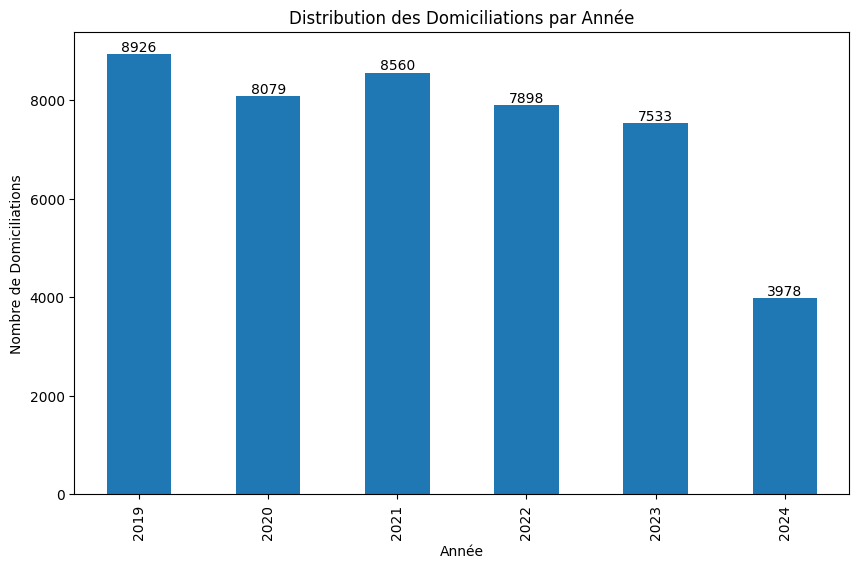

In [9]:
plt.figure(figsize=(10, 6))
ax = distribution_by_year.plot(kind='bar', color=colors[0])
plt.title('Distribution des Domiciliations par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Domiciliations')
# Ajouter des annotations
for i in ax.containers:
    ax.bar_label(i, label_type="edge")
plt.show()

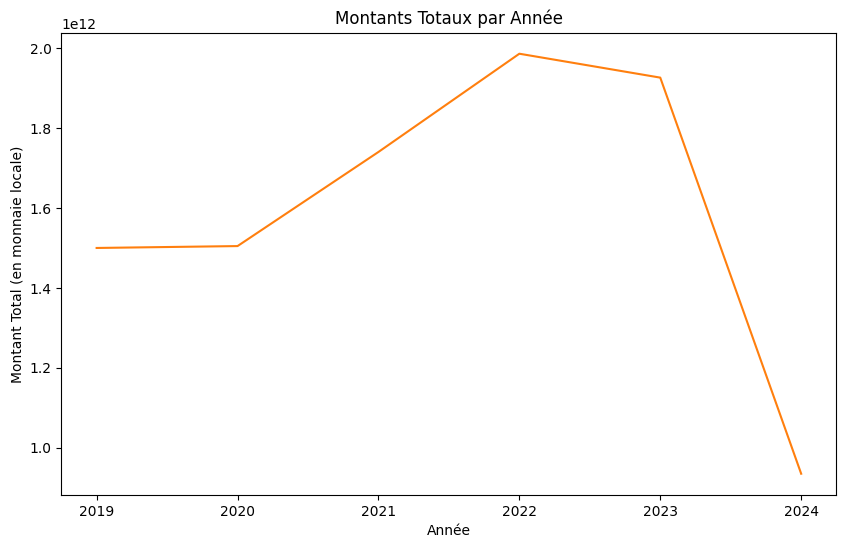

In [11]:
# Analyse des montants totaux par année
total_amount_by_year = domiciliation.groupby('YEAR')['MONT_LOC'].sum()

plt.figure(figsize=(10, 6))
ax = total_amount_by_year.plot(kind='line', color=colors[1])
plt.title('Montants Totaux par Année')
plt.xlabel('Année')
plt.ylabel('Montant Total (en monnaie locale)')
plt.show()

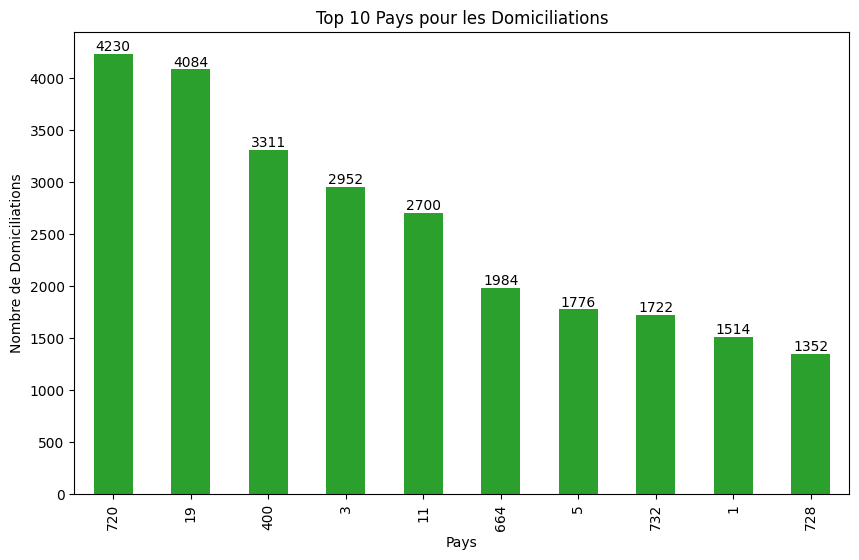

In [13]:
# Identification des pays les plus fréquents pour les domiciliations
top_countries = domiciliation['PAYS'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = top_countries.plot(kind='bar', color=colors[2])
plt.title('Top 10 Pays pour les Domiciliations')
plt.xlabel('Pays')
plt.ylabel('Nombre de Domiciliations')
# Ajouter des annotations
for i in ax.containers:
    ax.bar_label(i, label_type="edge")
plt.show()

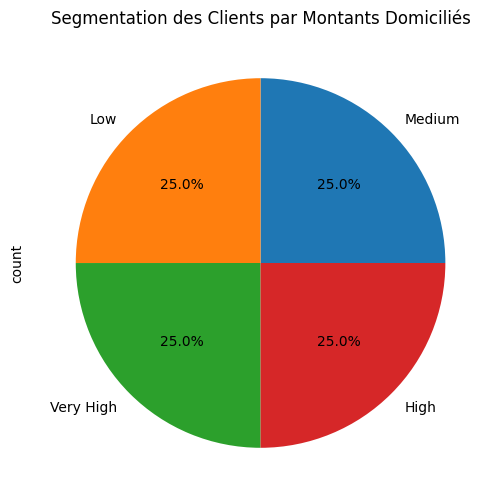

In [14]:
# Segmentation basée sur les montants domiciliés
domiciliation['Client_Segment'] = pd.qcut(domiciliation['MONT_LOC'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Distribution des segments de clients
client_segments = domiciliation['Client_Segment'].value_counts()

plt.figure(figsize=(10, 6))
client_segments.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Segmentation des Clients par Montants Domiciliés')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_26892\3536595686.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  operation_types_by_segment = domiciliation.groupby('Client_Segment')['TYP'].value_counts().unstack()


<Figure size 1400x800 with 0 Axes>

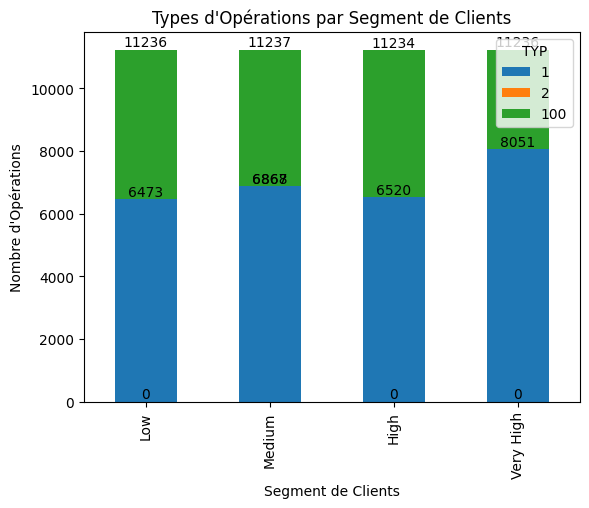

In [18]:
# Types d'opérations par segment de clients
operation_types_by_segment = domiciliation.groupby('Client_Segment')['TYP'].value_counts().unstack()

plt.figure(figsize=(14, 8))
ax = operation_types_by_segment.plot(kind='bar', stacked=True, color=colors)
plt.title('Types d\'Opérations par Segment de Clients')
plt.xlabel('Segment de Clients')
plt.ylabel('Nombre d\'Opérations')
# Ajouter des annotations
for container in ax.containers:
    ax.bar_label(container, label_type="edge")
plt.show()

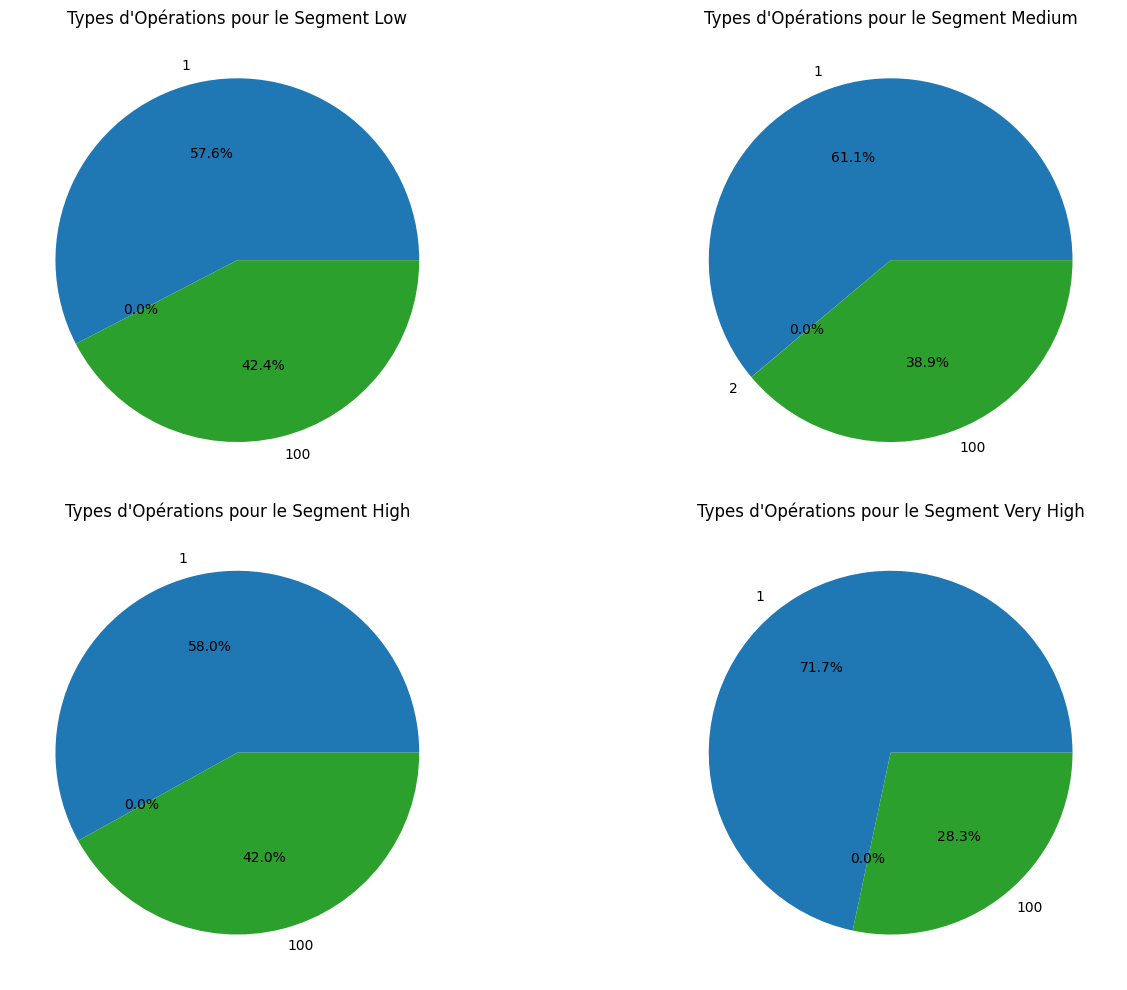

In [19]:
# Graphiques en secteurs pour chaque segment
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
segments = ['Low', 'Medium', 'High', 'Very High']
axes = axes.flatten()

for i, segment in enumerate(segments):
    operation_types_by_segment.loc[segment].plot(kind='pie', ax=axes[i], autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f'Types d\'Opérations pour le Segment {segment}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

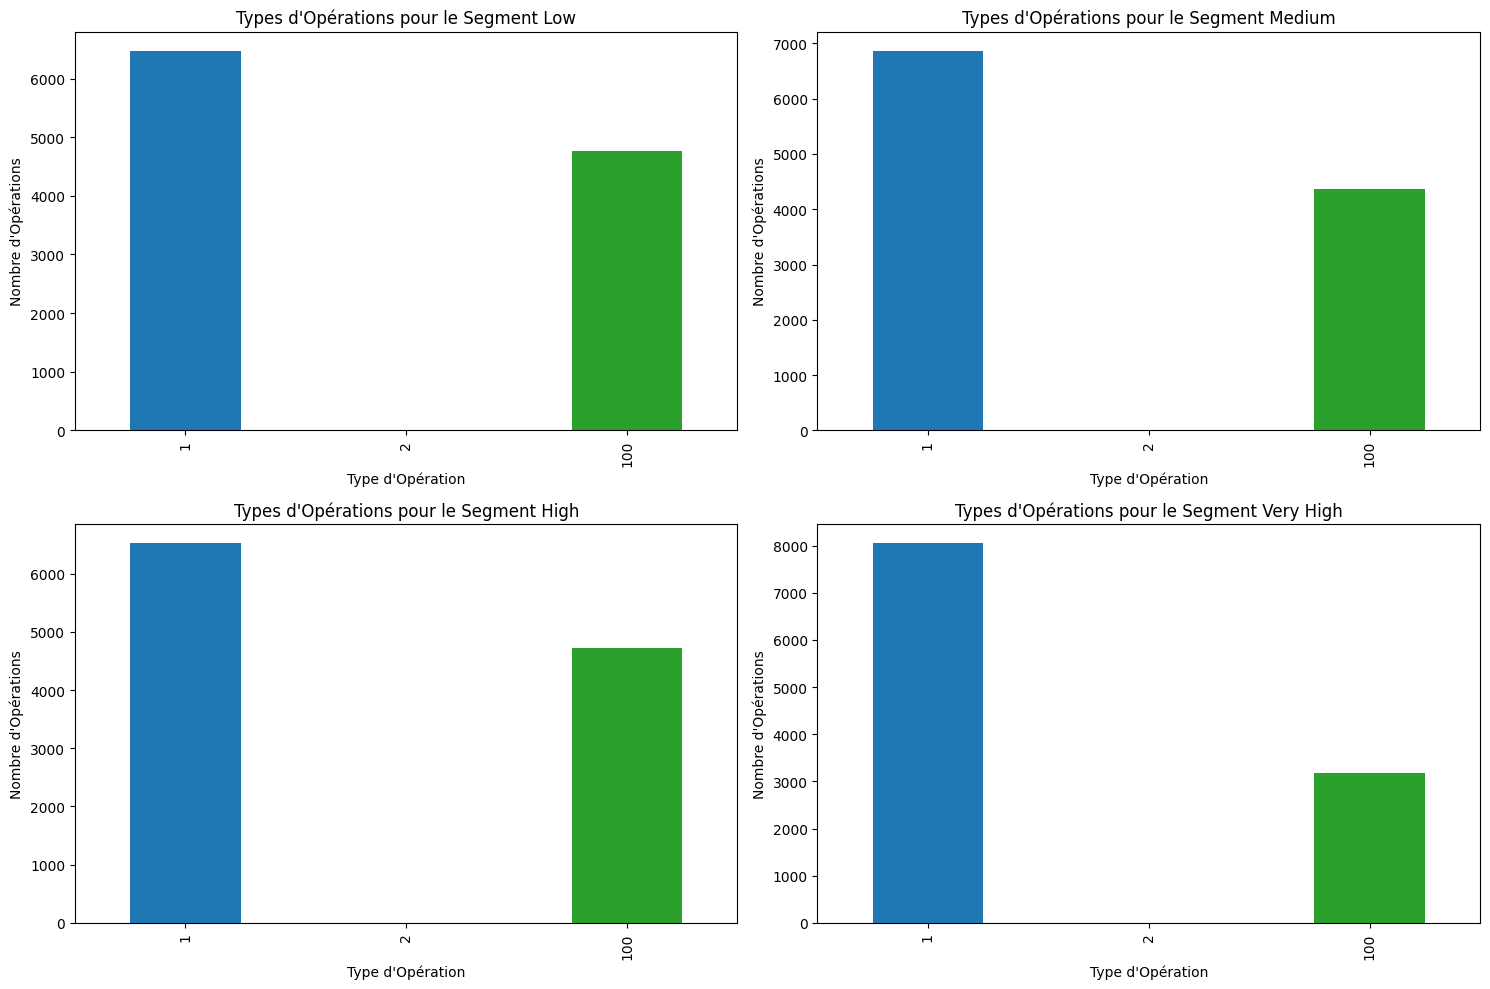

In [20]:
# Graphiques en barres séparés pour chaque segment
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
segments = ['Low', 'Medium', 'High', 'Very High']
axes = axes.flatten()

for i, segment in enumerate(segments):
    operation_types_by_segment.loc[segment].plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(f'Types d\'Opérations pour le Segment {segment}')
    axes[i].set_xlabel('Type d\'Opération')
    axes[i].set_ylabel('Nombre d\'Opérations')

plt.tight_layout()
plt.show()

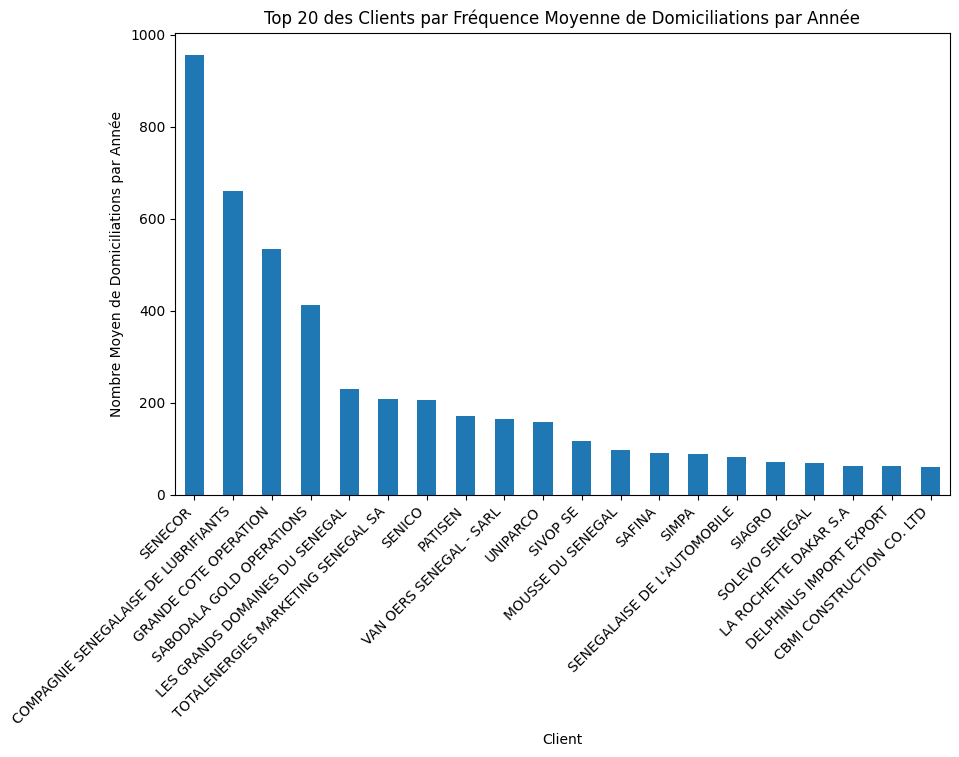

In [29]:
# Calculer la fréquence des domiciliations par client et par année
frequency_by_client_year = domiciliation.groupby(['NOM client', 'YEAR']).size().unstack(fill_value=0)

# Calculer la moyenne des domiciliations par client et par année
average_frequency = frequency_by_client_year.mean(axis=1).sort_values(ascending=False)

# Prendre le top 20 des clients par fréquence moyenne
top_20_average_frequency = average_frequency.head(20)

plt.figure(figsize=(10, 6))
top_20_average_frequency.plot(kind='bar', color=colors[0])
plt.title('Top 20 des Clients par Fréquence Moyenne de Domiciliations par Année')
plt.xlabel('Client')
plt.ylabel('Nombre Moyen de Domiciliations par Année')
plt.xticks(rotation=45, ha='right')
plt.show()


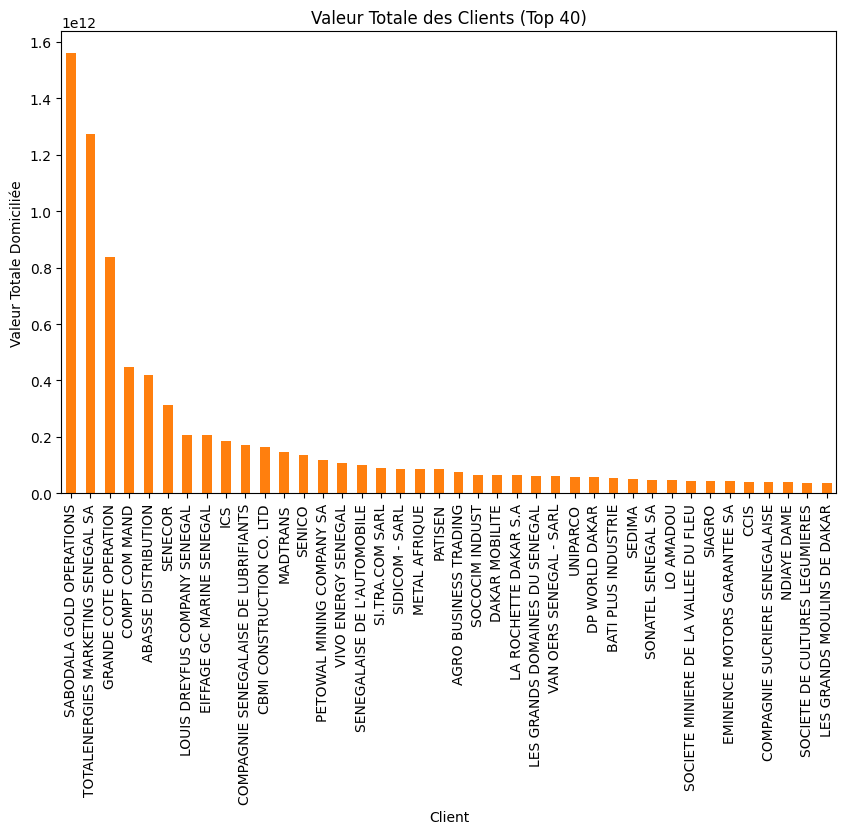

In [23]:
# Calculer la valeur totale domiciliée par client
total_value_by_client = domiciliation.groupby('NOM client')['MONT_LOC'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
total_value_by_client.head(40).plot(kind='bar', color=colors[1])
plt.title('Valeur Totale des Clients (Top 40)')
plt.xlabel('Client')
plt.ylabel('Valeur Totale Domiciliée')
plt.show()


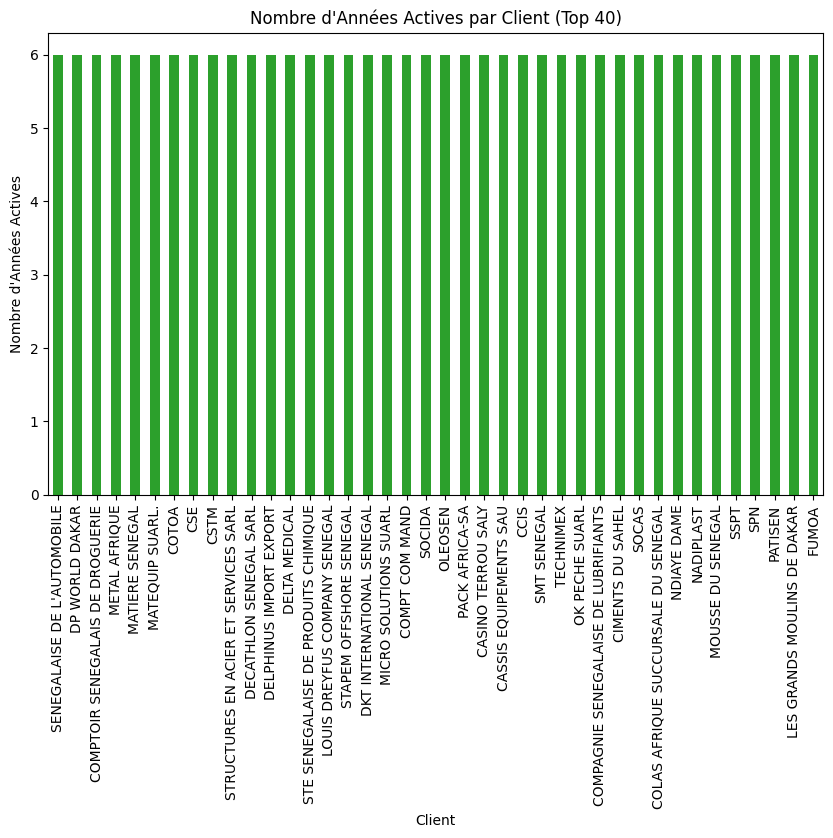

In [25]:
# Calculer le nombre d'années actives pour chaque client
active_years_by_client = frequency_by_client_year.apply(lambda row: row.astype(bool).sum(), axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
active_years_by_client.head(40).plot(kind='bar', color=colors[2])
plt.title('Nombre d\'Années Actives par Client (Top 40)')
plt.xlabel('Client')
plt.ylabel('Nombre d\'Années Actives')
plt.show()


In [30]:
from sklearn.cluster import KMeans




In [31]:
# Préparation des données pour le clustering
clustering_data = domiciliation.groupby('NOM client').agg({
    'MONT_LOC': 'sum',
    'DOUV': 'nunique'
}).rename(columns={'MONT_LOC': 'Total_MONT_LOC', 'DOUV': 'Domiciliation_Count'}).fillna(0)

# Clustering k-means
kmeans = KMeans(n_clusters=4)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)



In [32]:
# Renommer les clusters
cluster_names = {0: 'Petits Clients', 1: 'Clients Stratégiques', 2: 'Grands Clients', 3: 'Clients Actifs'}
clustering_data['Cluster Name'] = clustering_data['Cluster'].map(cluster_names)

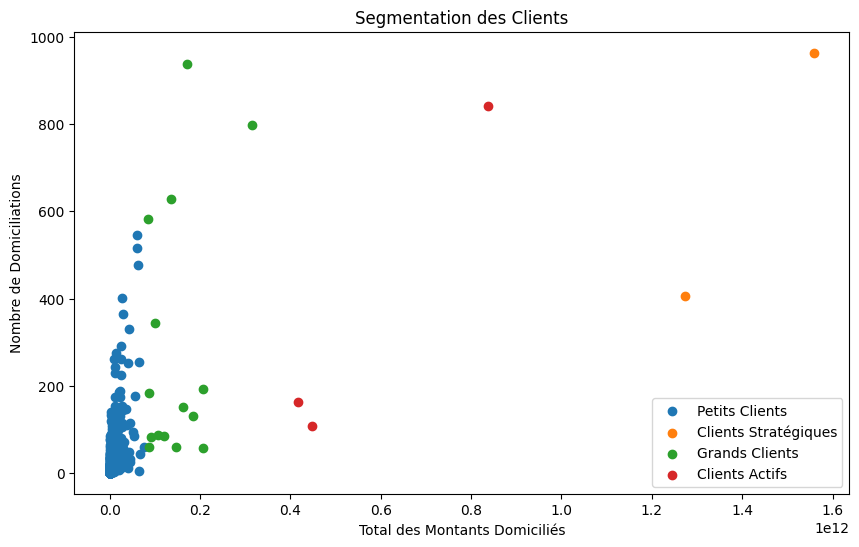

In [33]:
# Visualisation des clusters
plt.figure(figsize=(10, 6))
for cluster in cluster_names.values():
    clustered_data = clustering_data[clustering_data['Cluster Name'] == cluster]
    plt.scatter(clustered_data['Total_MONT_LOC'], clustered_data['Domiciliation_Count'], label=cluster)
plt.xlabel('Total des Montants Domiciliés')
plt.ylabel('Nombre de Domiciliations')
plt.legend()
plt.title('Segmentation des Clients')
plt.show()


Top 10 des Petits Clients :
                                Total_MONT_LOC  Domiciliation_Count
NOM client                                                         
AGRO BUSINESS TRADING             7.537385e+10                   60
SOCOCIM INDUST                    6.669510e+10                   44
DAKAR MOBILITE                    6.525780e+10                    5
LA ROCHETTE DAKAR S.A             6.501348e+10                  255
LES GRANDS DOMAINES DU SENEGAL    6.265409e+10                  476
VAN OERS SENEGAL - SARL           5.970783e+10                  515
UNIPARCO                          5.963847e+10                  546
DP WORLD DAKAR                    5.692066e+10                  177
BATI PLUS INDUSTRIE               5.307846e+10                   86
SEDIMA                            5.254321e+10                   94


<Figure size 1000x600 with 0 Axes>

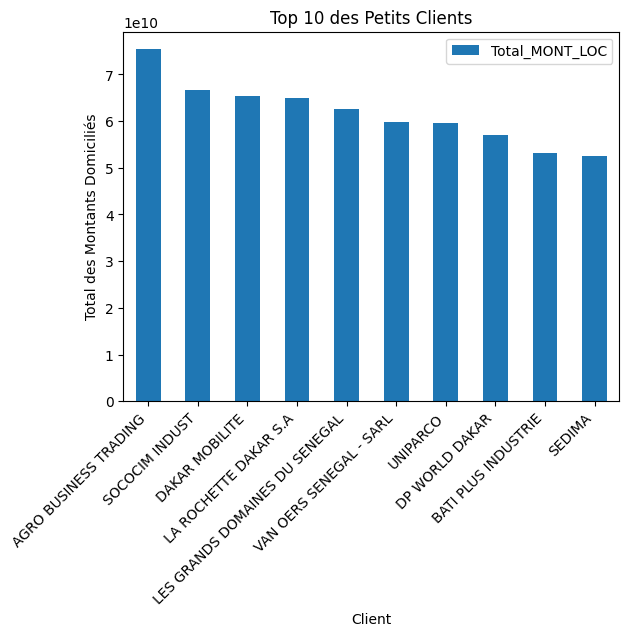


Top 10 des Clients Stratégiques :
                                    Total_MONT_LOC  Domiciliation_Count
NOM client                                                             
SABODALA GOLD OPERATIONS              1.559278e+12                  963
TOTALENERGIES MARKETING SENEGAL SA    1.273668e+12                  405


<Figure size 1000x600 with 0 Axes>

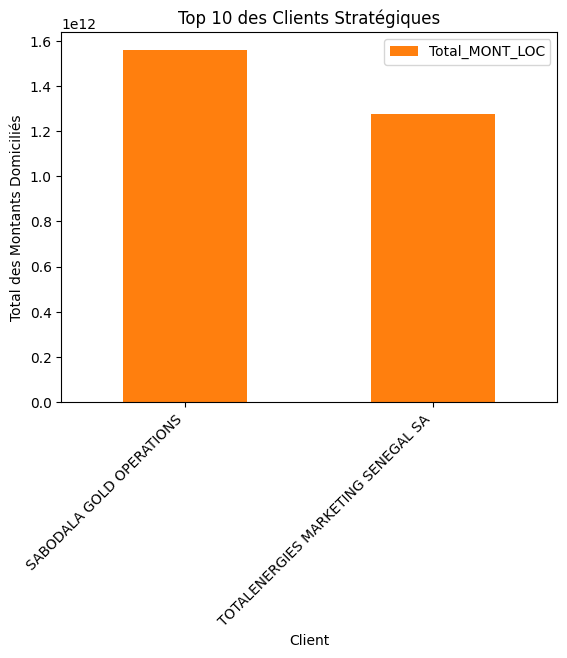


Top 10 des Grands Clients :
                                      Total_MONT_LOC  Domiciliation_Count
NOM client                                                               
SENECOR                                 3.141903e+11                  797
LOUIS DREYFUS COMPANY SENEGAL           2.077111e+11                   57
EIFFAGE GC MARINE SENEGAL               2.064771e+11                  192
ICS                                     1.837787e+11                  131
COMPAGNIE SENEGALAISE DE LUBRIFIANTS    1.718101e+11                  937
CBMI CONSTRUCTION CO. LTD               1.629216e+11                  152
MADTRANS                                1.471419e+11                   61
SENICO                                  1.364940e+11                  628
PETOWAL MINING COMPANY SA               1.193649e+11                   86
VIVO ENERGY SENEGAL                     1.065037e+11                   87


<Figure size 1000x600 with 0 Axes>

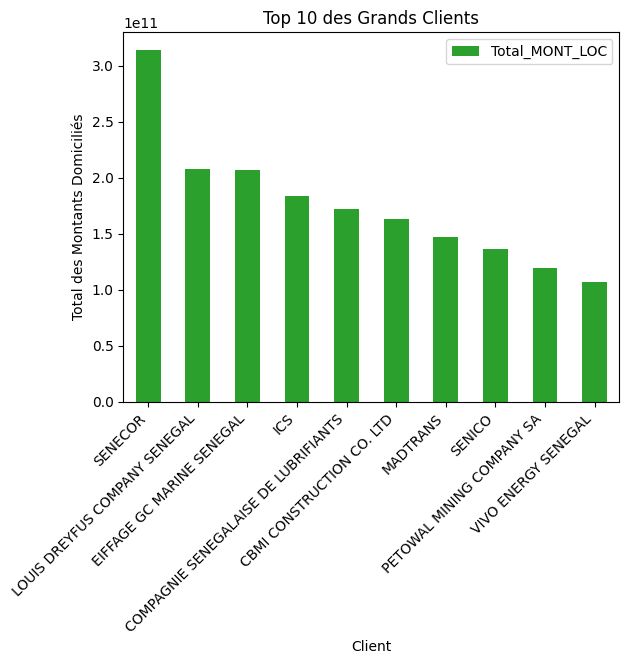


Top 10 des Clients Actifs :
                       Total_MONT_LOC  Domiciliation_Count
NOM client                                                
GRANDE COTE OPERATION    8.375744e+11                  841
COMPT COM MAND           4.482007e+11                  107
ABASSE DISTRIBUTION      4.178116e+11                  162


<Figure size 1000x600 with 0 Axes>

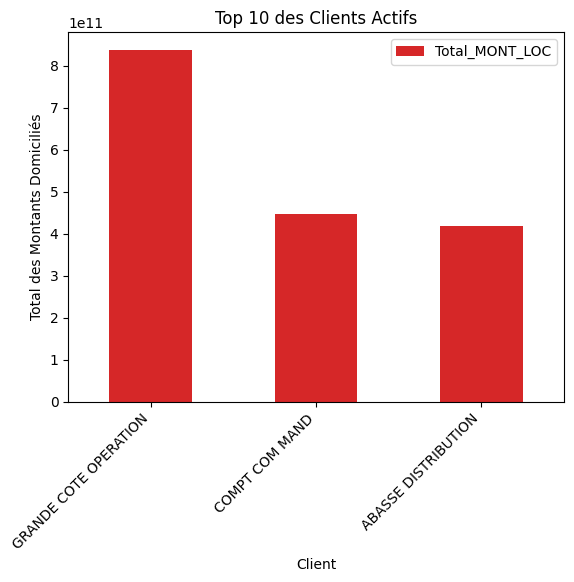

In [35]:
# Afficher le top 10 des clients par cluster
for cluster_id, cluster_name in cluster_names.items():
    print(f"\nTop 10 des {cluster_name} :")
    top_10_clients = clustering_data[clustering_data['Cluster Name'] == cluster_name].sort_values(by='Total_MONT_LOC', ascending=False).head(10)
    print(top_10_clients[['Total_MONT_LOC', 'Domiciliation_Count']])
    
    plt.figure(figsize=(10, 6))
    top_10_clients[['Total_MONT_LOC']].plot(kind='bar', color=colors[cluster_id], title=f'Top 10 des {cluster_name}')
    plt.xlabel('Client')
    plt.ylabel('Total des Montants Domiciliés')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [36]:
domiciliation['YEAR'] = domiciliation['DOUV'].dt.year

In [38]:
# Merge clustering_data with the original domiciliation data
domiciliation = domiciliation.merge(clustering_data[['Cluster', 'Cluster Name']], left_on='NOM client', right_index=True, how='left')

# Vérifier que la fusion s'est bien déroulée et que les colonnes sont présentes
print(domiciliation.head())

    AGE  OPE     EVE            NDOM  TYP  DEV        NCPP                NOM  \
0  1500  778  118427  001406/IM/2023    1   86  5000815164  MOUSSE DU SENEGAL   
1  1500  778  118428  001407/IM/2023    1   86  5000815164  MOUSSE DU SENEGAL   
2  1500  477   14341  001409/IM/2023    1   86  5000802303              SOBOA   
3   500  778  130264  001408/IM/2023    1   86  5001009917    AKTIVCO SENEGAL   
4  1500  778  118430  001410/IM/2023    1   86  5000802246                CSE   

   PAYS        MTDV  ...       DOUV  DANN       CLI         NOM client  GES  \
0   736    33250.00  ... 2023-04-03   NaN   8151615  MOUSSE DU SENEGAL  414   
1   720    64240.00  ... 2023-04-03   NaN   8151615  MOUSSE DU SENEGAL  414   
2   212    68674.56  ... 2023-04-03   NaN   8023000              SOBOA  409   
3   720    25914.73  ... 2023-04-03   NaN  26100991    AKTIVCO SENEGAL  657   
4    19  1828720.00  ... 2023-04-03   NaN   8022400                CSE  385   

                 NOMGEST  YEAR Client_


Top 10 des Petits Clients pour l'année 2023 :
NOM client
DAKAR MOBILITE                         3.241800e+10
AGRO BUSINESS TRADING                  2.849794e+10
DIEYE GLOBAL FOOD AND IMPORT EXPORT    2.124787e+10
COMPAGNIE SUCRIERE SENEGALAISE         2.121986e+10
AKTIVCO SENEGAL                        1.953188e+10
UNIPARCO                               1.508414e+10
DIEYE TRADING INTERNATIONAL            1.479169e+10
CFAO MOTORS SENEGAL SA                 1.447649e+10
SOCOCIM INDUST                         1.395674e+10
LES GRANDS MOULINS DE DAKAR            1.267952e+10
Name: MONT_LOC, dtype: float64


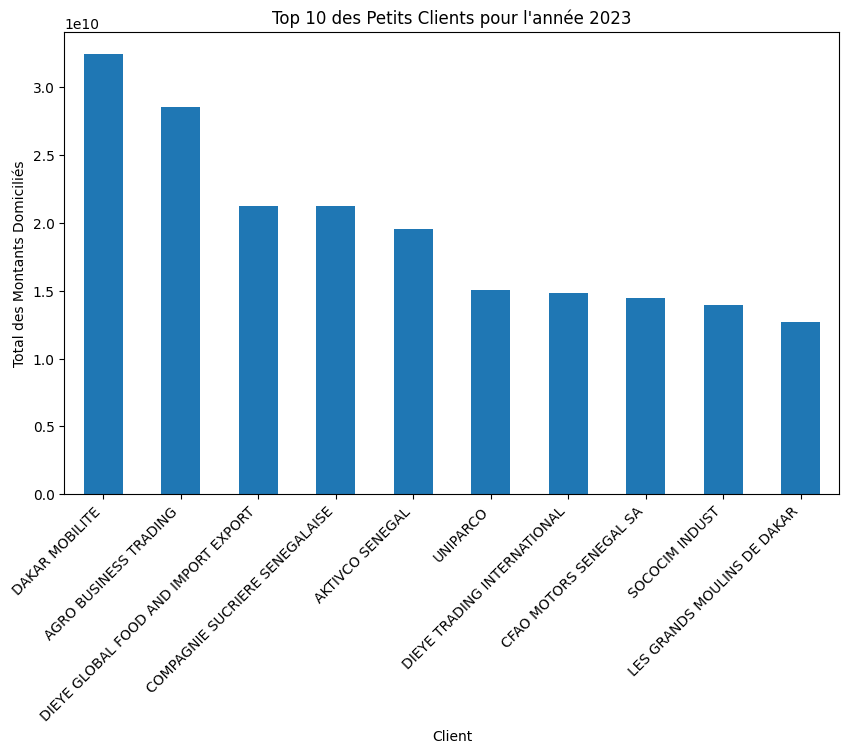


Top 10 des Clients Stratégiques pour l'année 2023 :
NOM client
TOTALENERGIES MARKETING SENEGAL SA    2.521322e+11
SABODALA GOLD OPERATIONS              1.896686e+11
Name: MONT_LOC, dtype: float64


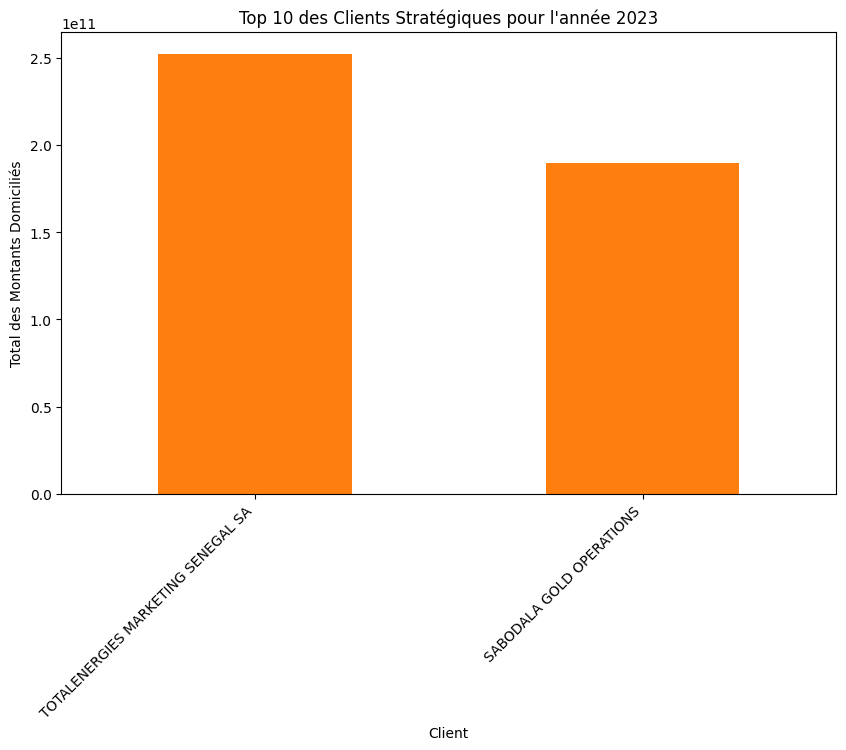


Top 10 des Grands Clients pour l'année 2023 :
NOM client
ICS                                     1.204358e+11
SENECOR                                 5.743901e+10
MADTRANS                                5.005528e+10
LOUIS DREYFUS COMPANY SENEGAL           4.982845e+10
SIDICOM - SARL                          4.606327e+10
VIVO ENERGY SENEGAL                     4.540974e+10
COMPAGNIE SENEGALAISE DE LUBRIFIANTS    2.993713e+10
SENEGALAISE DE L'AUTOMOBILE             2.229720e+10
SI.TRA.COM SARL                         1.794040e+10
SENICO                                  1.605531e+10
Name: MONT_LOC, dtype: float64


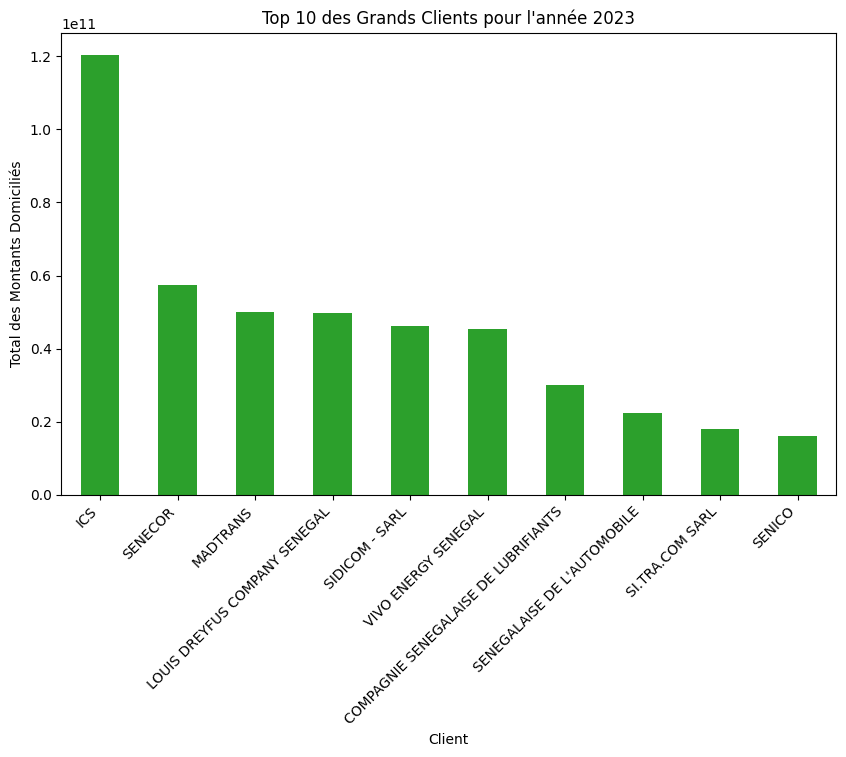


Top 10 des Clients Actifs pour l'année 2023 :
NOM client
GRANDE COTE OPERATION    1.513274e+11
ABASSE DISTRIBUTION      1.176669e+11
COMPT COM MAND           1.066228e+11
Name: MONT_LOC, dtype: float64


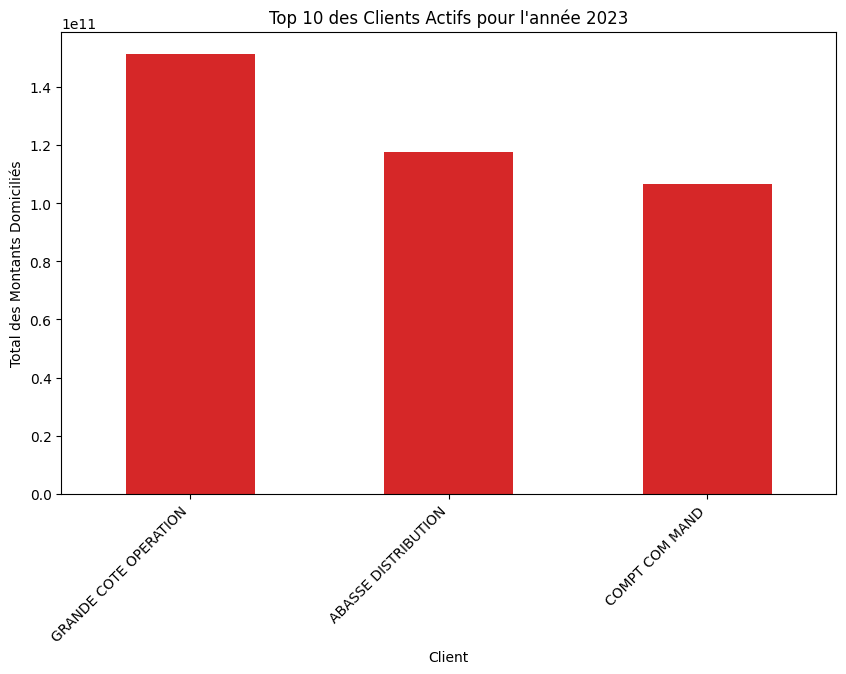


Top 10 des Petits Clients pour l'année 2022 :
NOM client
AGRO BUSINESS TRADING                   3.623539e+10
DAKAR MOBILITE                          3.266817e+10
SOCOCIM INDUST                          2.779544e+10
SEDIMA                                  1.724698e+10
SOCIETE MINIERE DE LA VALLEE DU FLEU    1.529130e+10
LA ROCHETTE DAKAR S.A                   1.365066e+10
UNIPARCO                                1.271079e+10
CCIS                                    1.171297e+10
CIMENTS DU SAHEL                        1.165918e+10
PROJET TER SENEGAL GROUPEMENT E.C.Y     1.139387e+10
Name: MONT_LOC, dtype: float64


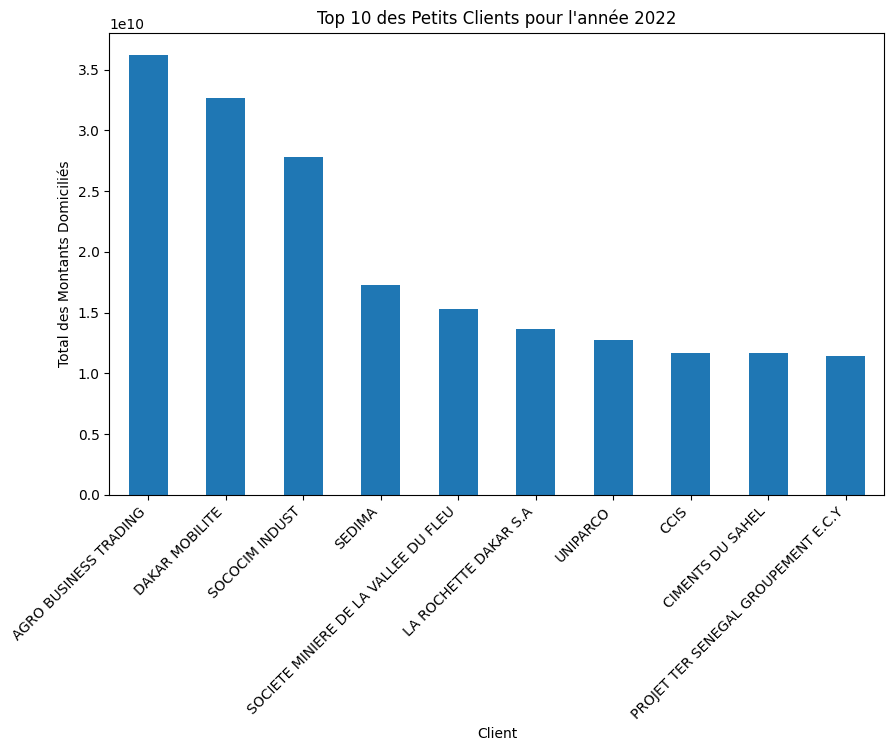


Top 10 des Clients Stratégiques pour l'année 2022 :
NOM client
SABODALA GOLD OPERATIONS              3.506784e+11
TOTALENERGIES MARKETING SENEGAL SA    2.881091e+11
Name: MONT_LOC, dtype: float64


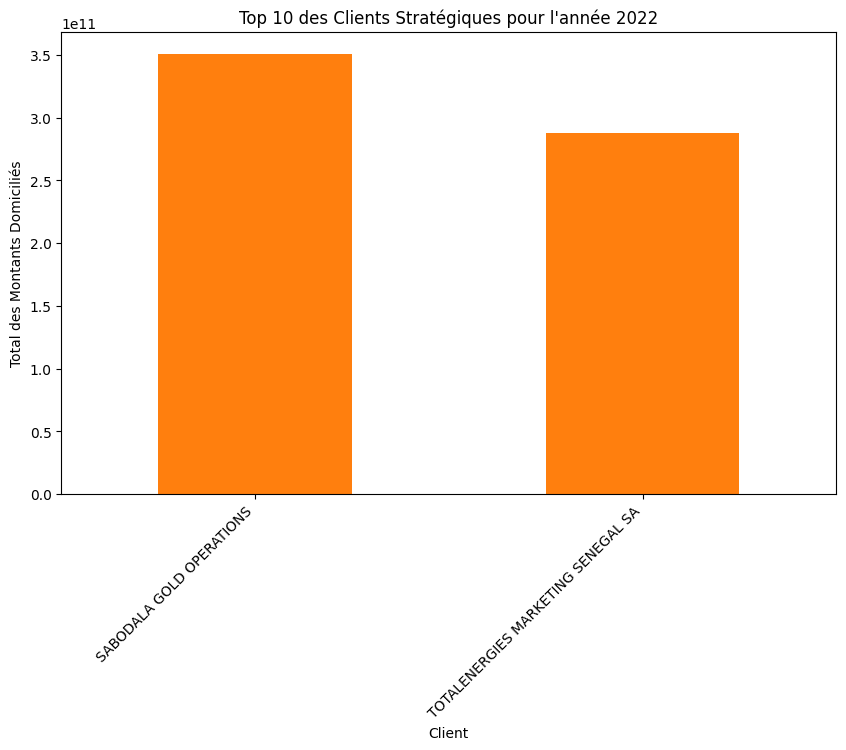


Top 10 des Grands Clients pour l'année 2022 :
NOM client
MADTRANS                                7.622215e+10
SENECOR                                 6.438970e+10
CBMI CONSTRUCTION CO. LTD               5.210295e+10
LOUIS DREYFUS COMPANY SENEGAL           4.667413e+10
COMPAGNIE SENEGALAISE DE LUBRIFIANTS    4.176566e+10
SENICO                                  3.101651e+10
EIFFAGE GC MARINE SENEGAL               2.771767e+10
VIVO ENERGY SENEGAL                     2.497375e+10
SENEGALAISE DE L'AUTOMOBILE             2.252313e+10
SI.TRA.COM SARL                         1.461955e+10
Name: MONT_LOC, dtype: float64


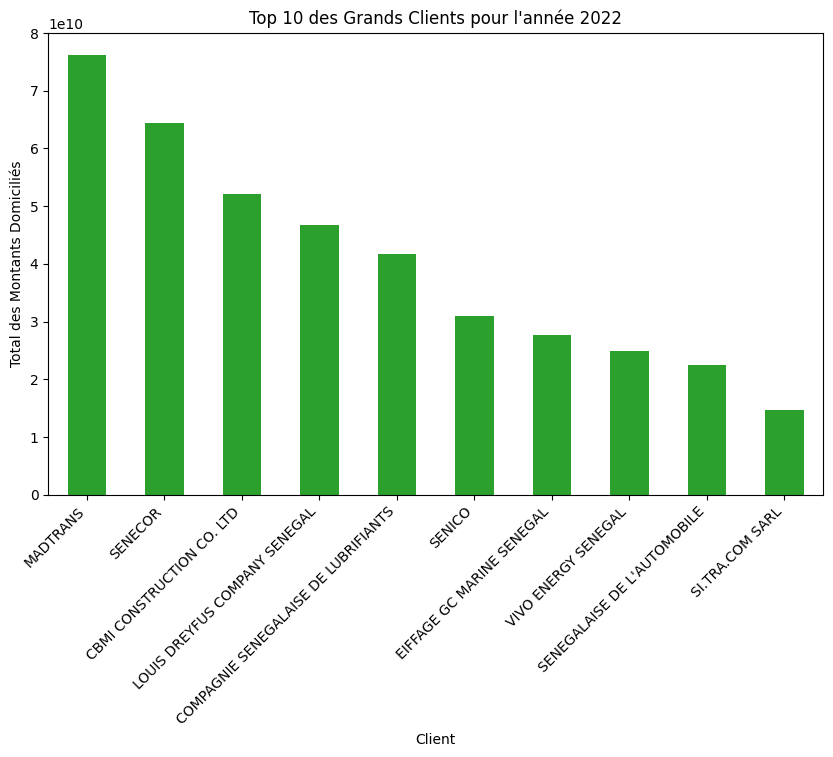


Top 10 des Clients Actifs pour l'année 2022 :
NOM client
GRANDE COTE OPERATION    2.251319e+11
ABASSE DISTRIBUTION      8.362695e+10
COMPT COM MAND           2.042324e+10
Name: MONT_LOC, dtype: float64


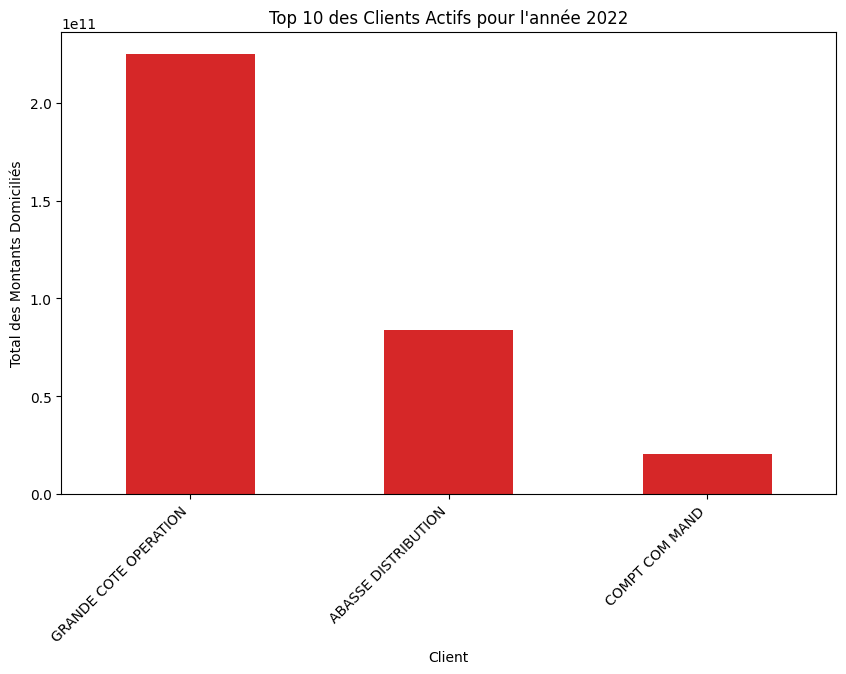


Top 10 des Petits Clients pour l'année 2019 :
NOM client
SOCIETE DE CULTURES LEGUMIERES         1.460389e+10
UNIPARCO                               1.341728e+10
DP WORLD DAKAR                         1.333679e+10
EMINENCE MOTORS GARANTEE SA            1.209351e+10
PROJET TER SENEGAL GROUPEMENT E.C.Y    1.160448e+10
LES GRANDS DOMAINES DU SENEGAL         1.024507e+10
KEC INTERNATIONAL LIMITED              1.012620e+10
SEDIMA                                 9.883606e+09
LA ROCHETTE DAKAR S.A                  9.826141e+09
SIMPA                                  9.417092e+09
Name: MONT_LOC, dtype: float64


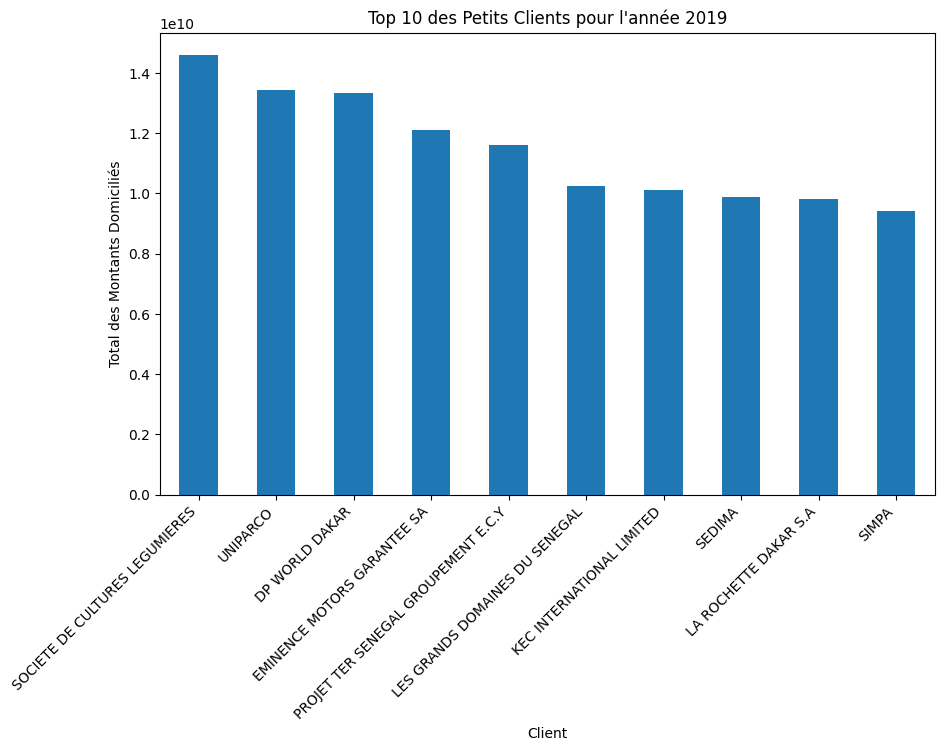


Top 10 des Clients Stratégiques pour l'année 2019 :
NOM client
TOTALENERGIES MARKETING SENEGAL SA    2.497034e+11
SABODALA GOLD OPERATIONS              2.242124e+11
Name: MONT_LOC, dtype: float64


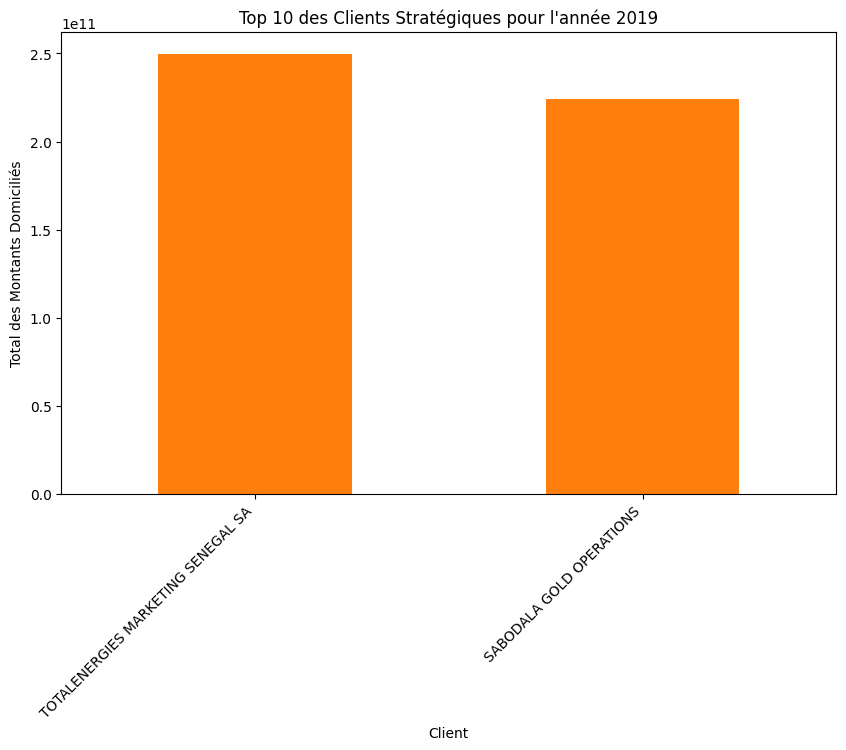


Top 10 des Grands Clients pour l'année 2019 :
NOM client
PETOWAL MINING COMPANY SA               1.191977e+11
SENECOR                                 4.477547e+10
COMPAGNIE SENEGALAISE DE LUBRIFIANTS    3.569134e+10
PATISEN                                 2.983934e+10
SENICO                                  2.573499e+10
SENEGALAISE DE L'AUTOMOBILE             2.399594e+10
METAL AFRIQUE                           2.264834e+10
LOUIS DREYFUS COMPANY SENEGAL           1.829734e+10
SI.TRA.COM SARL                         1.672888e+10
EIFFAGE GC MARINE SENEGAL               1.437799e+10
Name: MONT_LOC, dtype: float64


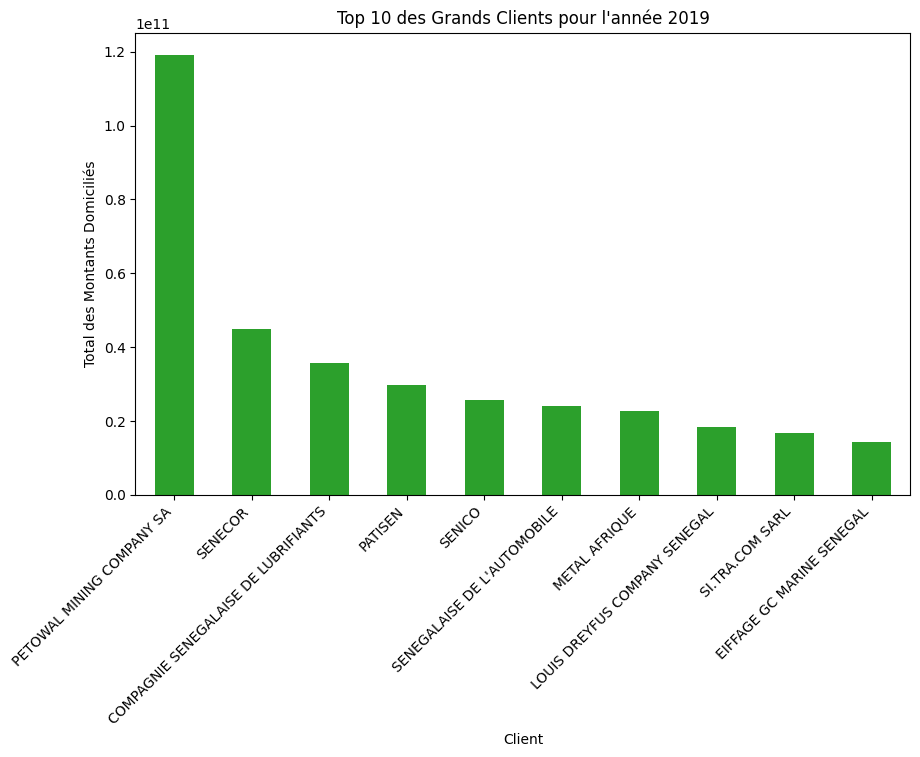


Top 10 des Clients Actifs pour l'année 2019 :
NOM client
GRANDE COTE OPERATION    1.232486e+11
COMPT COM MAND           6.733248e+10
ABASSE DISTRIBUTION      4.727265e+10
Name: MONT_LOC, dtype: float64


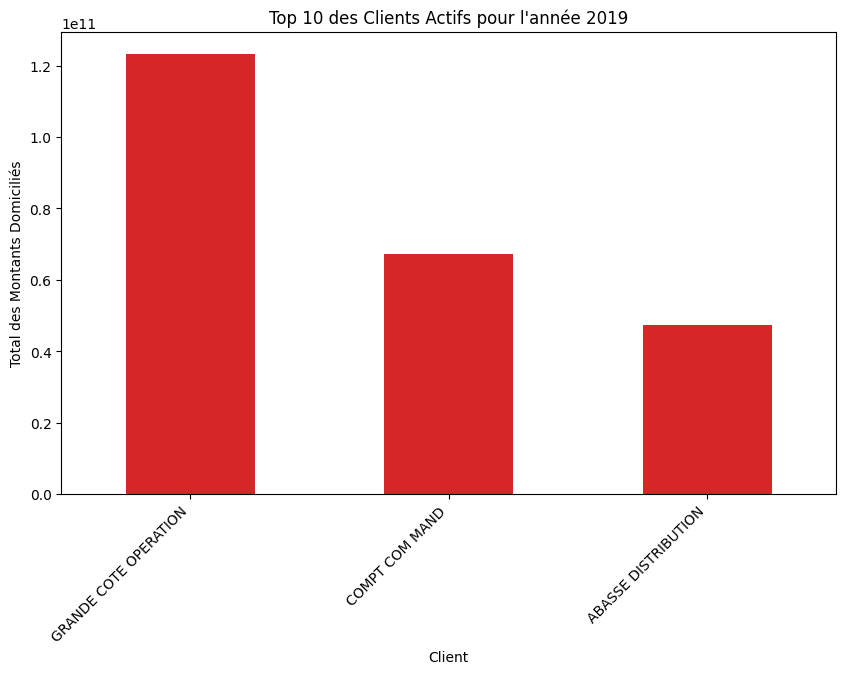


Top 10 des Petits Clients pour l'année 2021 :
NOM client
CHINA GEZHOUBA GROUP INTERNATIONAL    2.443430e+10
SONATEL SENEGAL SA                    1.929556e+10
LA ROCHETTE DAKAR S.A                 1.791424e+10
GLOBO AFRIQUE SARL                    1.678519e+10
BATI PLUS INDUSTRIE                   1.657608e+10
LO AMADOU                             1.354430e+10
LES GRANDS DOMAINES DU SENEGAL        1.346408e+10
DP WORLD DAKAR                        1.333508e+10
VAN OERS SENEGAL - SARL               1.246922e+10
SOCOCIM INDUST                        1.137762e+10
Name: MONT_LOC, dtype: float64


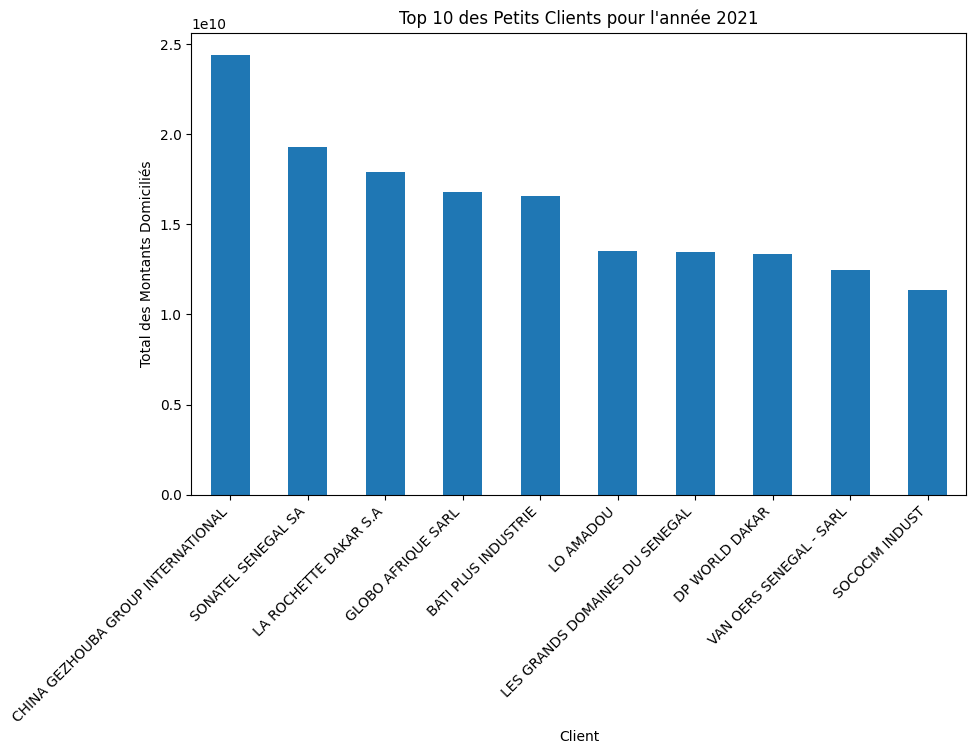


Top 10 des Clients Stratégiques pour l'année 2021 :
NOM client
SABODALA GOLD OPERATIONS              4.315917e+11
TOTALENERGIES MARKETING SENEGAL SA    2.039898e+11
Name: MONT_LOC, dtype: float64


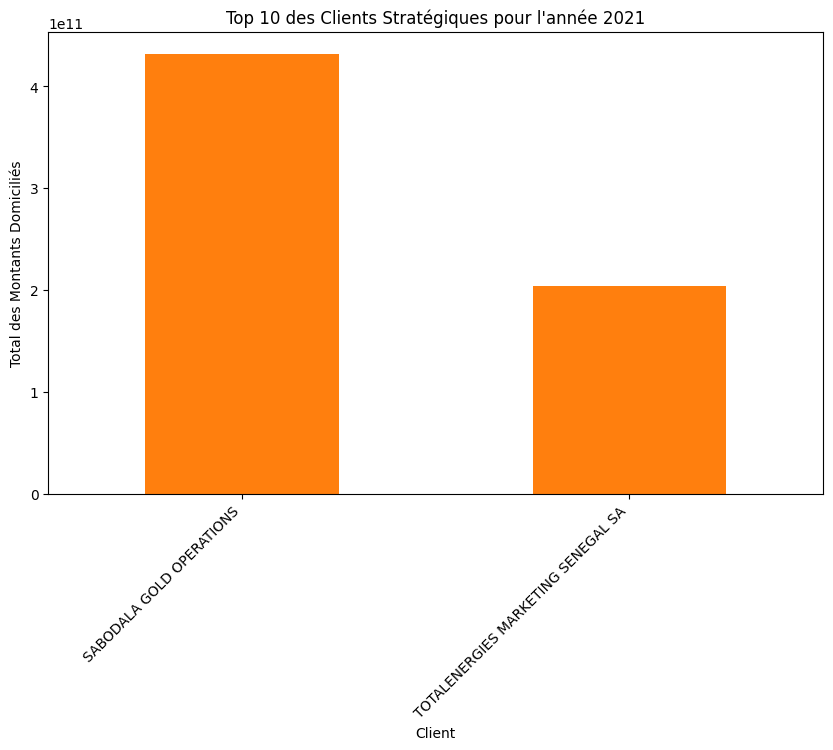


Top 10 des Grands Clients pour l'année 2021 :
NOM client
CBMI CONSTRUCTION CO. LTD               1.024091e+11
SENECOR                                 6.545213e+10
COMPAGNIE SENEGALAISE DE LUBRIFIANTS    4.035274e+10
LOUIS DREYFUS COMPANY SENEGAL           3.653464e+10
SENICO                                  2.515911e+10
SI.TRA.COM SARL                         1.841203e+10
PATISEN                                 1.479470e+10
SENEGALAISE DE L'AUTOMOBILE             1.283469e+10
METAL AFRIQUE                           1.269305e+10
EIFFAGE GC MARINE SENEGAL               1.107625e+10
Name: MONT_LOC, dtype: float64


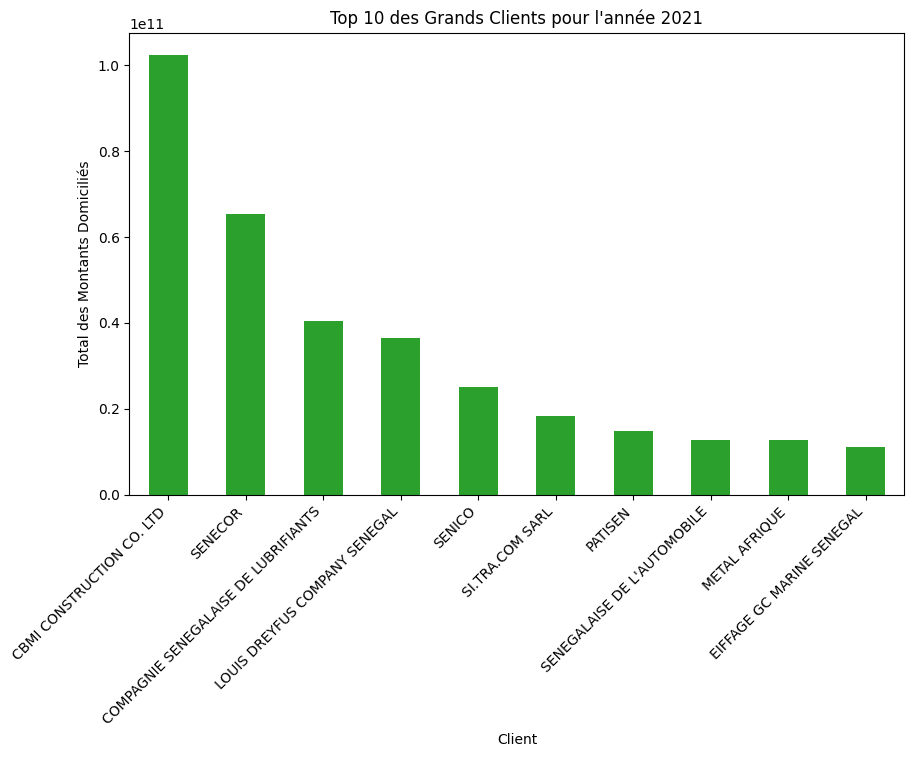


Top 10 des Clients Actifs pour l'année 2021 :
NOM client
GRANDE COTE OPERATION    1.541598e+11
COMPT COM MAND           6.841908e+10
ABASSE DISTRIBUTION      5.367912e+10
Name: MONT_LOC, dtype: float64


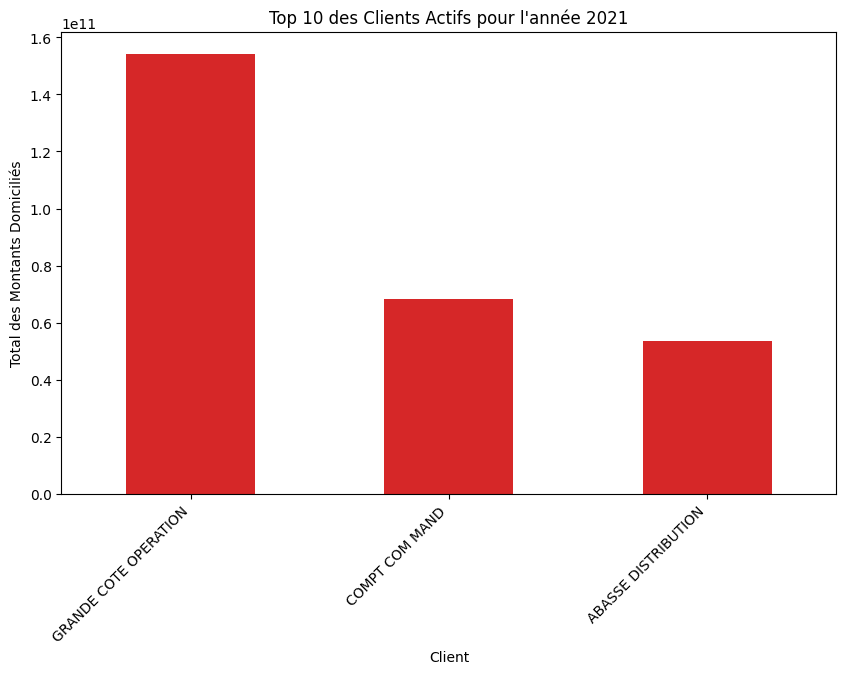


Top 10 des Petits Clients pour l'année 2020 :
NOM client
DP WORLD DAKAR                          2.464416e+10
LO AMADOU                               1.671655e+10
LES GRANDS DOMAINES DU SENEGAL          1.447620e+10
EMINENCE MOTORS GARANTEE SA             1.399150e+10
LA ROCHETTE DAKAR S.A                   1.250886e+10
SOCIETE DE CULTURES LEGUMIERES          1.249602e+10
KAHONE SOLAIRE SA                       1.224325e+10
VAN OERS SENEGAL - SARL                 1.204198e+10
BATI PLUS INDUSTRIE                     1.035570e+10
VAN OORD DRAGAGE ET TRAVAUX MARITIME    9.404972e+09
Name: MONT_LOC, dtype: float64


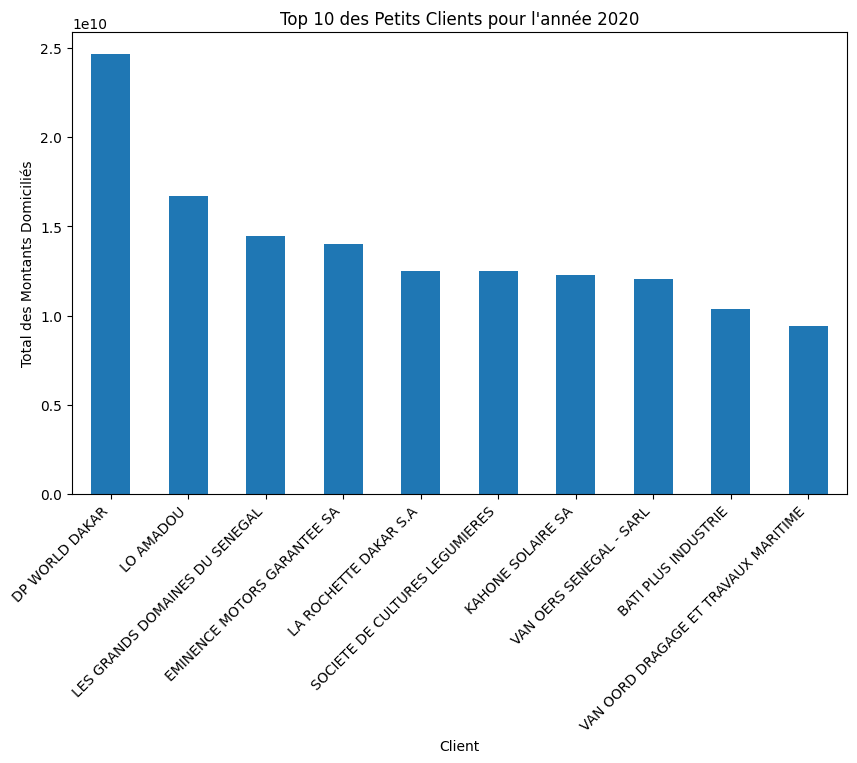


Top 10 des Clients Stratégiques pour l'année 2020 :
NOM client
SABODALA GOLD OPERATIONS              2.739689e+11
TOTALENERGIES MARKETING SENEGAL SA    1.594878e+11
Name: MONT_LOC, dtype: float64


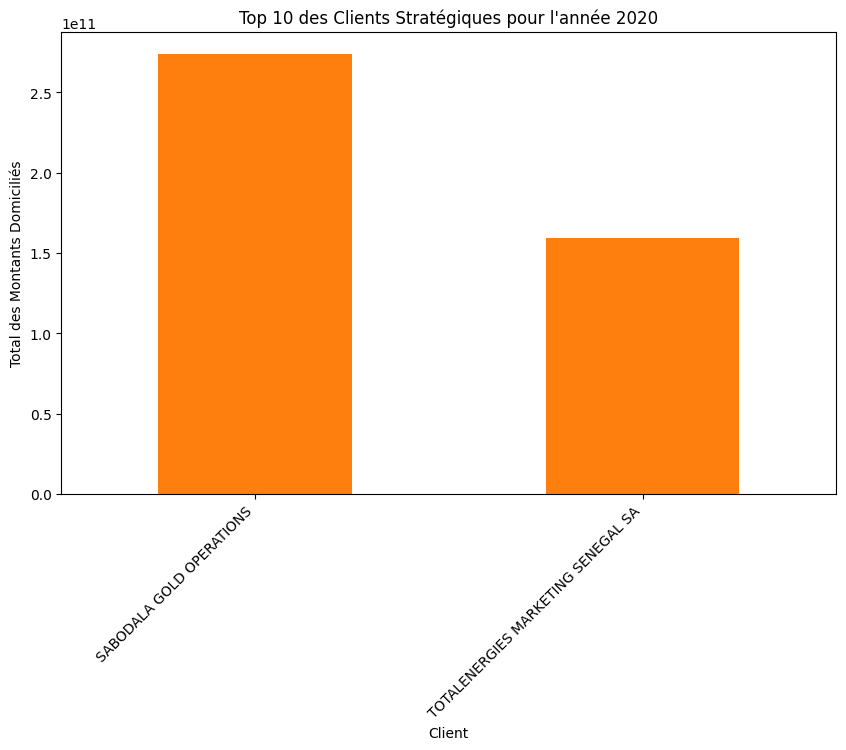


Top 10 des Grands Clients pour l'année 2020 :
NOM client
EIFFAGE GC MARINE SENEGAL               1.522601e+11
SENECOR                                 5.053820e+10
LOUIS DREYFUS COMPANY SENEGAL           3.796485e+10
SENICO                                  2.911838e+10
SI.TRA.COM SARL                         1.811979e+10
METAL AFRIQUE                           1.791416e+10
SENEGALAISE DE L'AUTOMOBILE             1.626370e+10
PATISEN                                 1.615010e+10
COMPAGNIE SENEGALAISE DE LUBRIFIANTS    1.608125e+10
SIDICOM - SARL                          8.150184e+09
Name: MONT_LOC, dtype: float64


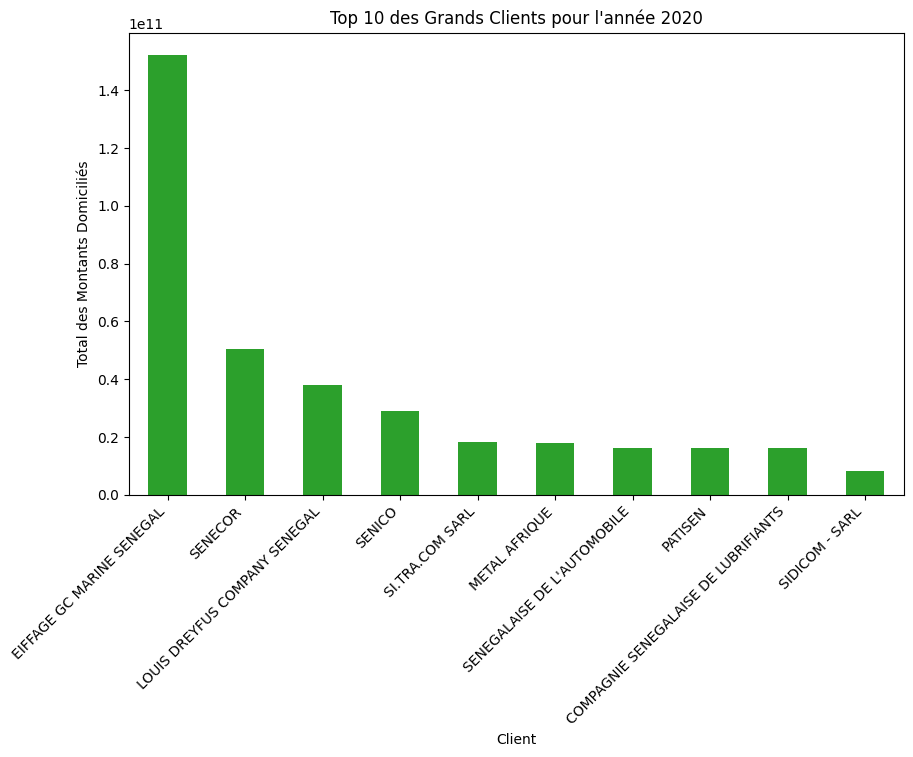


Top 10 des Clients Actifs pour l'année 2020 :
NOM client
GRANDE COTE OPERATION    1.166322e+11
COMPT COM MAND           1.122263e+11
ABASSE DISTRIBUTION      6.740527e+10
Name: MONT_LOC, dtype: float64


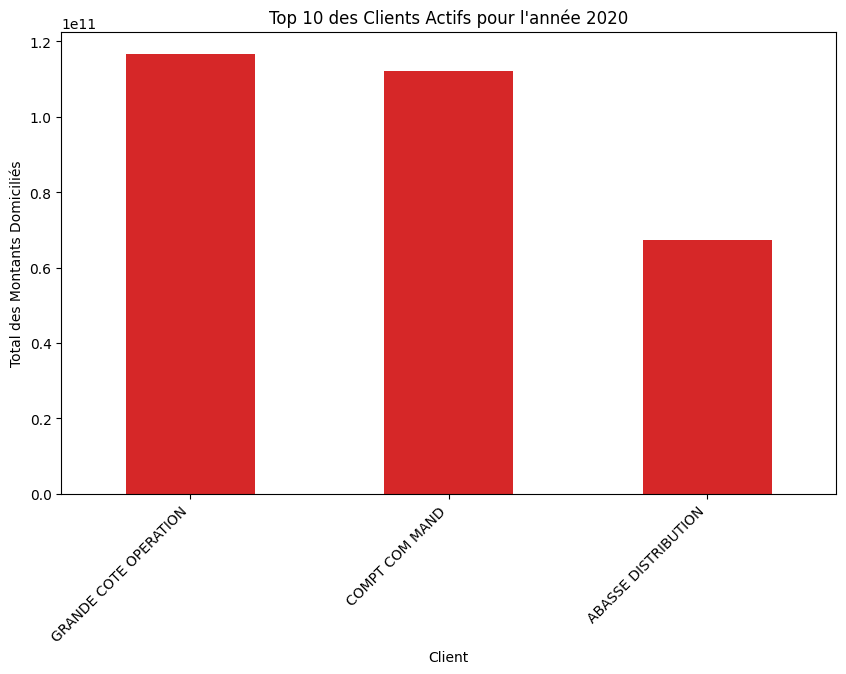


Top 10 des Petits Clients pour l'année 2024 :
NOM client
PFO AFRICA SENEGAL                      2.220439e+10
COMPAGNIE SUCRIERE SENEGALAISE          1.733179e+10
COMPTOIR COMMERCIAL MARIAMA SARL        1.235506e+10
SONATEL SENEGAL SA                      1.066379e+10
AGRO BUSINESS TRADING                   1.064053e+10
AKTIVCO SENEGAL                         1.058296e+10
EIFFAGE GENIE CIVIL SENEGAL             1.000798e+10
COLOMBE CYBER DEFENSE OPERATIONS CEN    9.966760e+09
CFAO MOTORS SENEGAL SA                  9.945621e+09
SEN'EAU - EAU DU SENEGAL SA             7.729087e+09
Name: MONT_LOC, dtype: float64


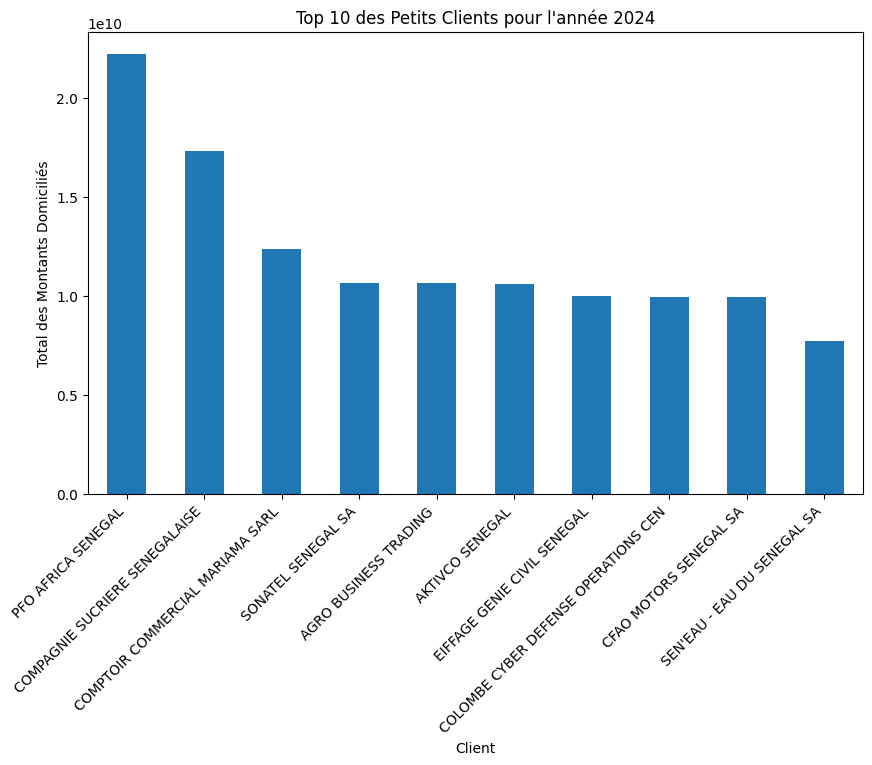


Top 10 des Clients Stratégiques pour l'année 2024 :
NOM client
TOTALENERGIES MARKETING SENEGAL SA    1.202461e+11
SABODALA GOLD OPERATIONS              8.915770e+10
Name: MONT_LOC, dtype: float64


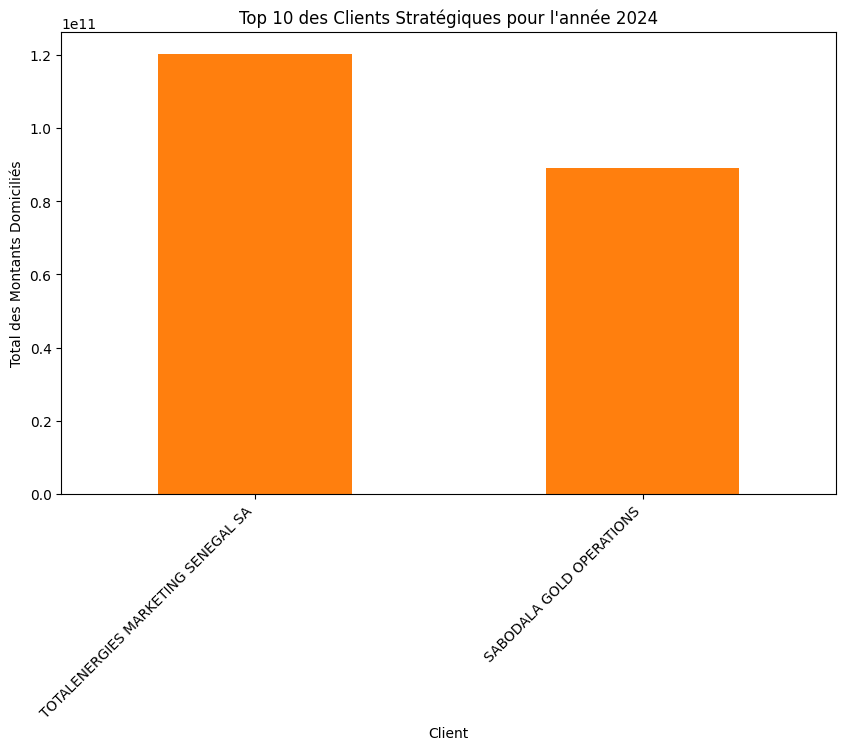


Top 10 des Grands Clients pour l'année 2024 :
NOM client
ICS                                     6.334285e+10
SENECOR                                 3.159583e+10
VIVO ENERGY SENEGAL                     2.843851e+10
LOUIS DREYFUS COMPANY SENEGAL           1.841172e+10
MADTRANS                                1.637175e+10
SENICO                                  9.409667e+09
METAL AFRIQUE                           9.279185e+09
COMPAGNIE SENEGALAISE DE LUBRIFIANTS    7.981967e+09
PATISEN                                 5.736248e+09
SI.TRA.COM SARL                         5.170263e+09
Name: MONT_LOC, dtype: float64


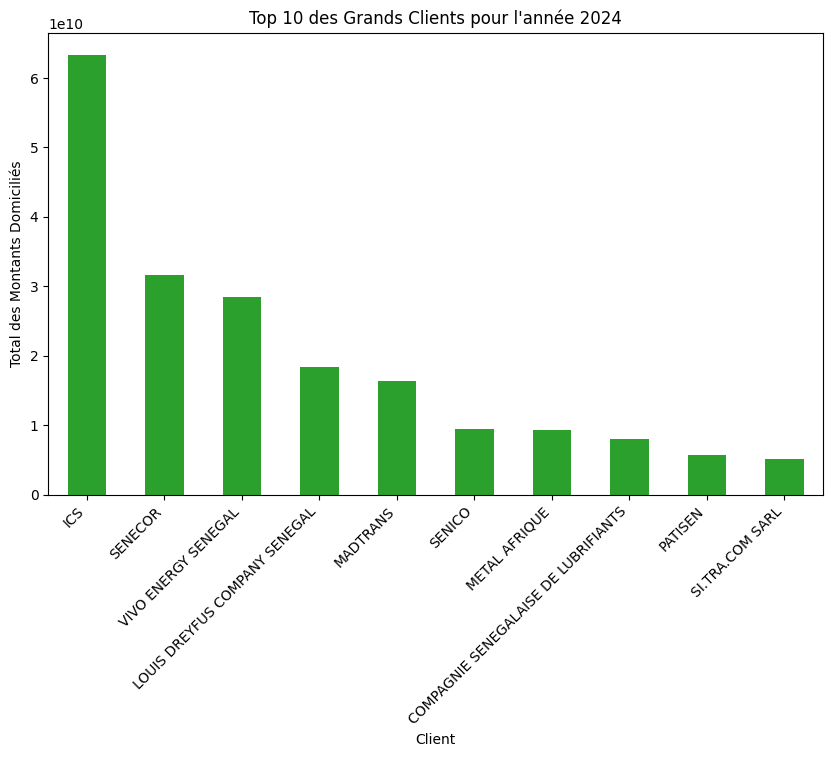


Top 10 des Clients Actifs pour l'année 2024 :
NOM client
COMPT COM MAND           7.317688e+10
GRANDE COTE OPERATION    6.707450e+10
ABASSE DISTRIBUTION      4.816067e+10
Name: MONT_LOC, dtype: float64


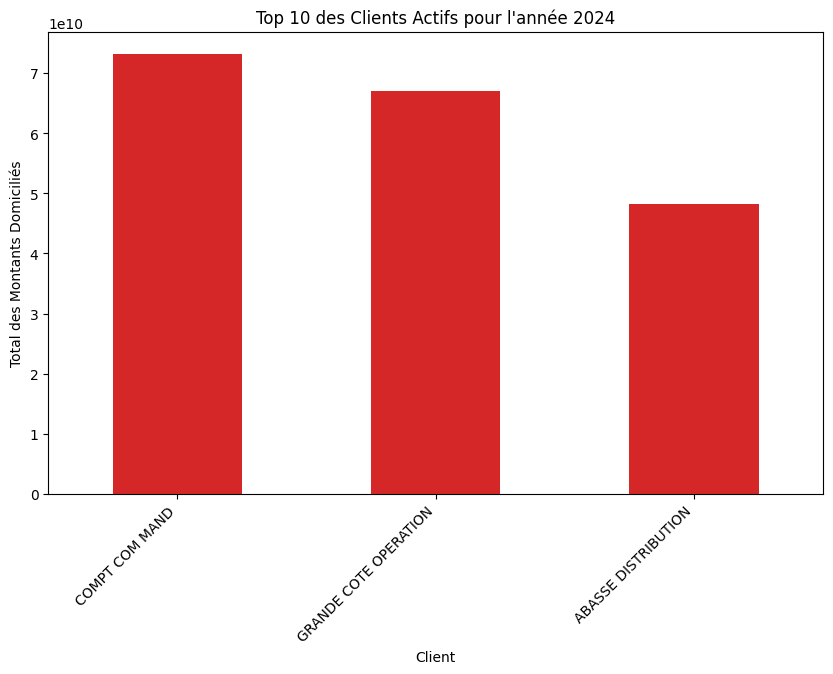

In [39]:
# Afficher le top 10 des clients par cluster et par année
for year in domiciliation['YEAR'].unique():
    for cluster_id, cluster_name in cluster_names.items():
        print(f"\nTop 10 des {cluster_name} pour l'année {year} :")
        filtered_data = domiciliation[(domiciliation['Cluster Name'] == cluster_name) & (domiciliation['YEAR'] == year)]
        if filtered_data.empty:
            print(f"Aucun client trouvé pour {cluster_name} en {year}")
            continue
        top_10_clients = filtered_data.groupby('NOM client')['MONT_LOC'].sum().sort_values(ascending=False).head(10)
        print(top_10_clients)
        
        plt.figure(figsize=(10, 6))
        top_10_clients.plot(kind='bar', color=colors[cluster_id], title=f'Top 10 des {cluster_name} pour l\'année {year}')
        plt.xlabel('Client')
        plt.ylabel('Total des Montants Domiciliés')
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [40]:
# Calculer des statistiques supplémentaires pour chaque client
client_stats = domiciliation.groupby('NOM client').agg({
    'MONT_LOC': ['sum', 'mean', 'count'],
    'YEAR': 'nunique'
})
client_stats.columns = ['Total_MONT_LOC', 'Mean_MONT_LOC', 'Domiciliation_Count', 'Active_Years']


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [42]:
# Normaliser les données
scaler = StandardScaler()
client_stats_normalized = scaler.fit_transform(client_stats)

In [43]:
# Appliquer le modèle de mélange gaussien (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
client_stats['Cluster'] = gmm.fit_predict(client_stats_normalized)

In [44]:
# Renommer les clusters en fonction des caractéristiques observées
cluster_names = {
    0: 'Clients à Faible Valeur',
    1: 'Clients à Haute Fréquence',
    2: 'Clients Premium',
    3: 'Clients à Moyenne Valeur'
}
client_stats['Cluster Name'] = client_stats['Cluster'].map(cluster_names)

In [45]:
# Merge les résultats de clustering avec les données originales
domiciliation = domiciliation.merge(client_stats[['Cluster', 'Cluster Name']], left_on='NOM client', right_index=True, how='left')

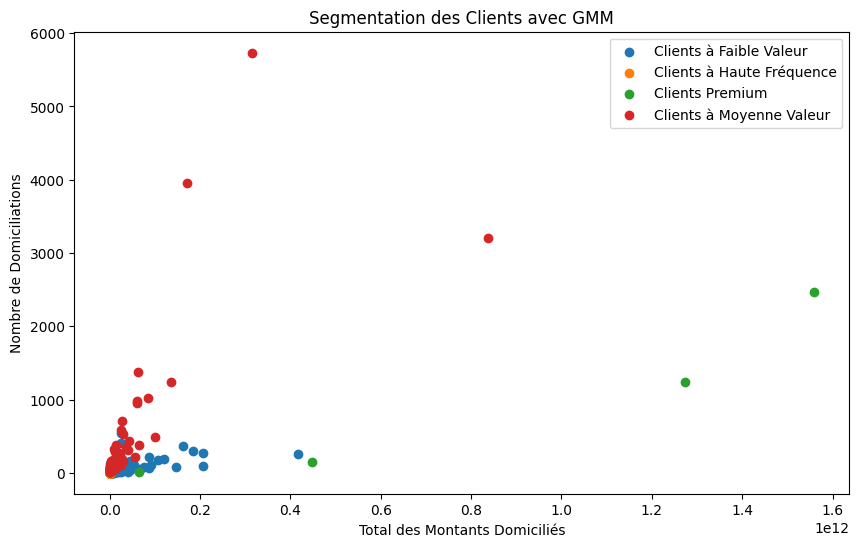

In [46]:
# Visualiser les clusters
plt.figure(figsize=(10, 6))
for cluster_name in cluster_names.values():
    clustered_data = client_stats[client_stats['Cluster Name'] == cluster_name]
    plt.scatter(clustered_data['Total_MONT_LOC'], clustered_data['Domiciliation_Count'], label=cluster_name)
plt.xlabel('Total des Montants Domiciliés')
plt.ylabel('Nombre de Domiciliations')
plt.legend()
plt.title('Segmentation des Clients avec GMM')
plt.show()